# Predicting Health Insurance Cost using Machine Learning with Python

### Data Set is from Kaggle - https://www.kaggle.com/datasets/mirichoi0218/insurance

#### Importing the needed Packages

In [89]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [63]:
df = pd.read_csv(r'C:\Users\Bora\Management Of RBR\RBR Builds - Documents\RBR Analytics\ML Test\medical Insurance Cost\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [64]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [66]:
df.shape

(1338, 7)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
# lets find nulls
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [69]:
df.describe()
# Only gives some statistical analysis on quantitative variable NOT Categorical

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\Bora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


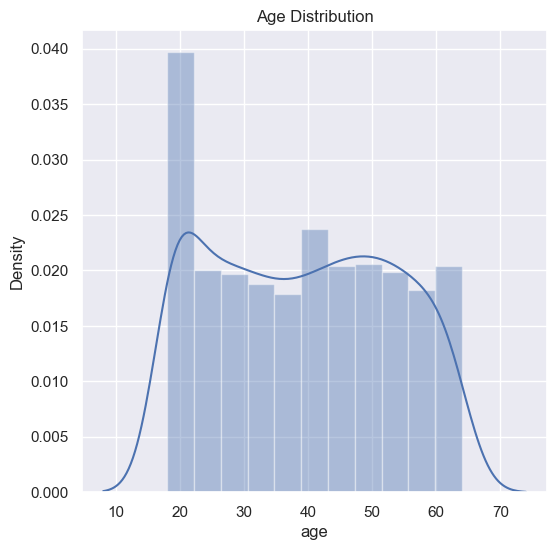

In [70]:
# lets visualize the distribution of Age
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

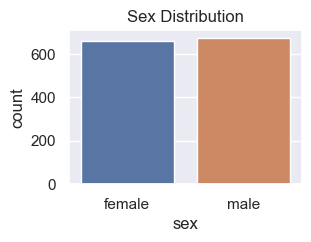

In [71]:
# Lets now look at sex Distribution
plt.figure(figsize= (3,2))
sns.countplot(x='sex', data= df) #We have to use the count function since gender is a categorical variable
plt.title('Sex Distribution')
plt.show()

In [72]:
# Lets now count it
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

c:\Users\Bora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


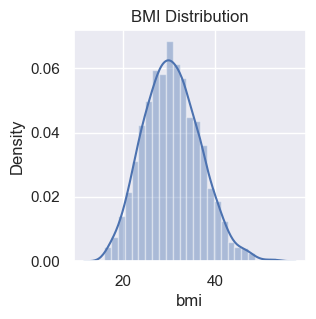

In [73]:
#BMI Distribution
plt.figure(figsize=(3,3))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range = 18.5 to 24.9

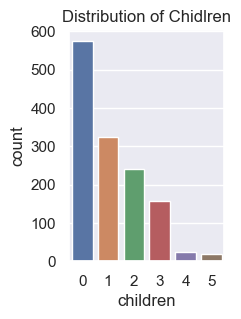

In [74]:
# Let's now look at the distribution of children
plt.figure(figsize= (2,3))
sns.countplot(x='children', data = df)
plt.title('Distribution of Chidlren')
plt.show()

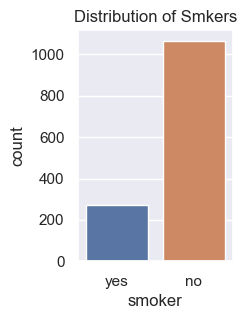

In [75]:
# let's now look at the distribution of smokers
plt.figure(figsize=(2,3))
sns.countplot(x='smoker', data= df)
plt.title('Distribution of Smkers')
plt.show()

In [76]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

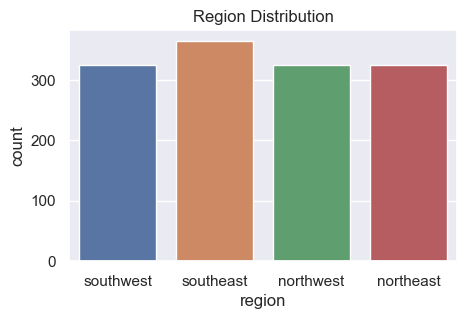

In [77]:
# Distribution of Region
plt.figure(figsize=(5,3))
sns.countplot(x='region', data = df)
plt.title('Region Distribution')
plt.show()

In [78]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

c:\Users\Bora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


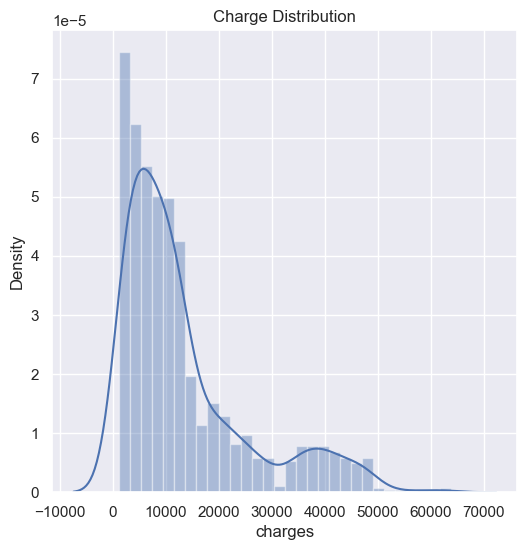

In [79]:
# Distribution of Charges
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charge Distribution')
plt.show()


# Data Preprocessing

### Encoding the categorical features to 0s and 1s

In [80]:
# Encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace = True)

# Encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# Encoding region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace= True)

In [81]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Splitting Dataset to Predictor and Predicted Column

In [82]:
X=df.drop(columns= 'charges', axis=1)
Y=df['charges']

In [83]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the Dataset into Training and Testing Data

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state= 2)

In [85]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


model = LinearRegression()

In [87]:
model.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation

In [91]:
# prediction on training data
x_train_prediction = model.predict(X_train)
r2_train = r2_score(Y_train, x_train_prediction)
print('R2 squared value: ', r2_train)

R2 squared value:  0.751505643411174


In [92]:
# Evaluation of Test Data
X_test_prediction = model.predict(X_test)
r2_test = r2_score(Y_test, X_test_prediction)
print('Test R2 Squared: ', r2_test)

Test R2 Squared:  0.7447273869684077


In [94]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.array(input_data)

# reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The insuacne cost is USD', prediction[0])

[3760.0805765]
The insuacne cost is USD 3760.0805764960496


c:\Users\Bora\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
